<a href="https://colab.research.google.com/github/ppelino/Projetos_colab/blob/main/Projeto_Transfer_learning_para_identifica%C3%A7%C3%A3o_de_objetos_ok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 11: Transfer learning para identificação de objetos  

- Neste projeto, vamos utilizar uma rede neural pré-treinada chamada MobileNet
- Utilizaremos a base de dados TensorFlow Flowers
- Código baseado na documentação abaixo:
https://www.tensorflow.org/beta/tutorials/images/hub_with_keras


# Etapa 1: Importação das bibliotecas

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import zipfile
tf.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.13.0'

In [ ]:
!pip install tensorflow_hub --upgrade
import tensorflow_hub as hub

# Etapa 2: Importação do modelo pré-treinado

In [ ]:
trained_MobileNet_url ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2" #@param {type:"string"}

In [ ]:
trained_MobileNet = tf.keras.Sequential([hub.KerasLayer(trained_MobileNet_url,
                                                        input_shape=(224,224,3))])

# Etapa 3: Testes com o modelo pré-treinado

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/Deep Learning Prático com TensorFlow e Python/Bases/Transfer-Learning-Data 2.zip"
zip_object = zipfile.ZipFile(file=path, mode="r")
zip_object.extractall("./")
zip_object.close()

In [ ]:
sample_image= tf.keras.preprocessing.image.load_img(r'/content/Transfer Learning Data/watch.jpg',
                                                    target_size = (224, 224))

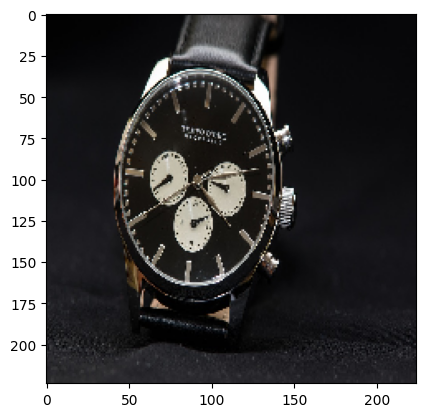

In [ ]:
plt.imshow(sample_image)

In [ ]:
sample_image = np.array(sample_image) / 255.0

In [ ]:
sample_image.shape

(224, 224, 3)

In [ ]:
predicted_class = trained_MobileNet.predict(np.expand_dims(sample_image, axis = 0))

1/1 [==============================] - 1s 746ms/step


In [ ]:
predicted_class

array([[ 0.31899253,  0.69766104, -0.48102057, ...,  0.2258538 ,
        -1.4412351 , -0.02521737]], dtype=float32)

In [ ]:
len(predicted_class[0])

1001

In [ ]:
predicted_class.shape

(1, 1001)

In [ ]:
predicted_class = np.argmax(predicted_class)
predicted_class

827

In [ ]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')

In [ ]:
imagenet_labels = np.array(open(labels_path).read().splitlines())

In [ ]:
imagenet_labels

array(['background', 'tench', 'goldfish', ..., 'bolete', 'ear',
       'toilet tissue'], dtype='<U30')

In [ ]:
len(imagenet_labels)

1001

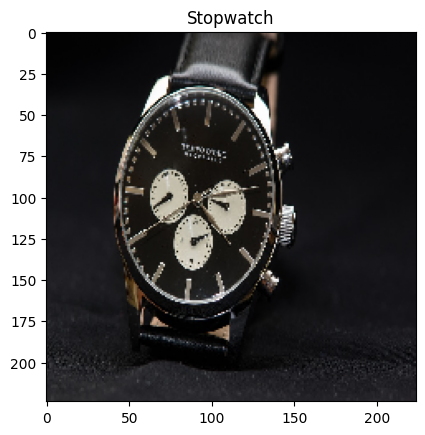

In [ ]:
plt.imshow(sample_image)
predicted_class_name = imagenet_labels[predicted_class]
plt.title(predicted_class_name.title());

# Etapa 4: Testes com um conjunto de imagens

In [ ]:
flowers_data_url = tf.keras.utils.get_file('flower_photos',
                                           'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
                                            untar=True)

In [ ]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
flower_data = image_generator.flow_from_directory(str(flowers_data_url),
                                                  target_size=(224,224),
                                                  batch_size=64,
                                                  shuffle=True)

Found 3670 images belonging to 5 classes.


In [ ]:
for flowers_data_input_batch, flowers_data_label_batch in flower_data:
  print("Image batch shape: ", flowers_data_input_batch.shape)
  print("Label batch shape: ", flowers_data_label_batch.shape)
  break

Image batch shape:  (64, 224, 224, 3)
Label batch shape:  (64, 5)


In [ ]:
predictions_batch = trained_MobileNet.predict(flowers_data_input_batch)
predictions_batch.shape

2/2 [==============================] - 0s 38ms/step


(64, 1001)

In [ ]:
predicted_class_names = imagenet_labels[np.argmax(predictions_batch, axis=-1)]
predicted_class_names

array(['mushroom', 'spider web', 'pot', 'bee', 'daisy', 'cardoon',
       'lifeboat', 'pot', 'sea urchin', 'ice cream', 'daisy', 'pot',
       'trailer truck', 'cardoon', 'daisy', 'vase', 'Bedlington terrier',
       'daisy', 'bee', 'window screen', 'daisy', 'daisy', 'fountain',
       'pot', 'wool', 'daisy', 'bee', 'daisy', 'daisy', 'daisy', 'teddy',
       'daisy', 'daisy', 'earthstar', 'barn spider', 'flamingo', 'daisy',
       'daisy', 'pot', 'studio couch', 'sea urchin', 'buckeye', 'pot',
       'daisy', 'buckeye', 'barn spider', 'hip', 'orange', 'daisy', 'pot',
       'daisy', 'hip', 'daisy', 'sea urchin', "jack-o'-lantern", 'daisy',
       'bee', 'daisy', 'bee', 'bee', 'rapeseed', 'cliff', 'hip',
       'cardoon'], dtype='<U30')

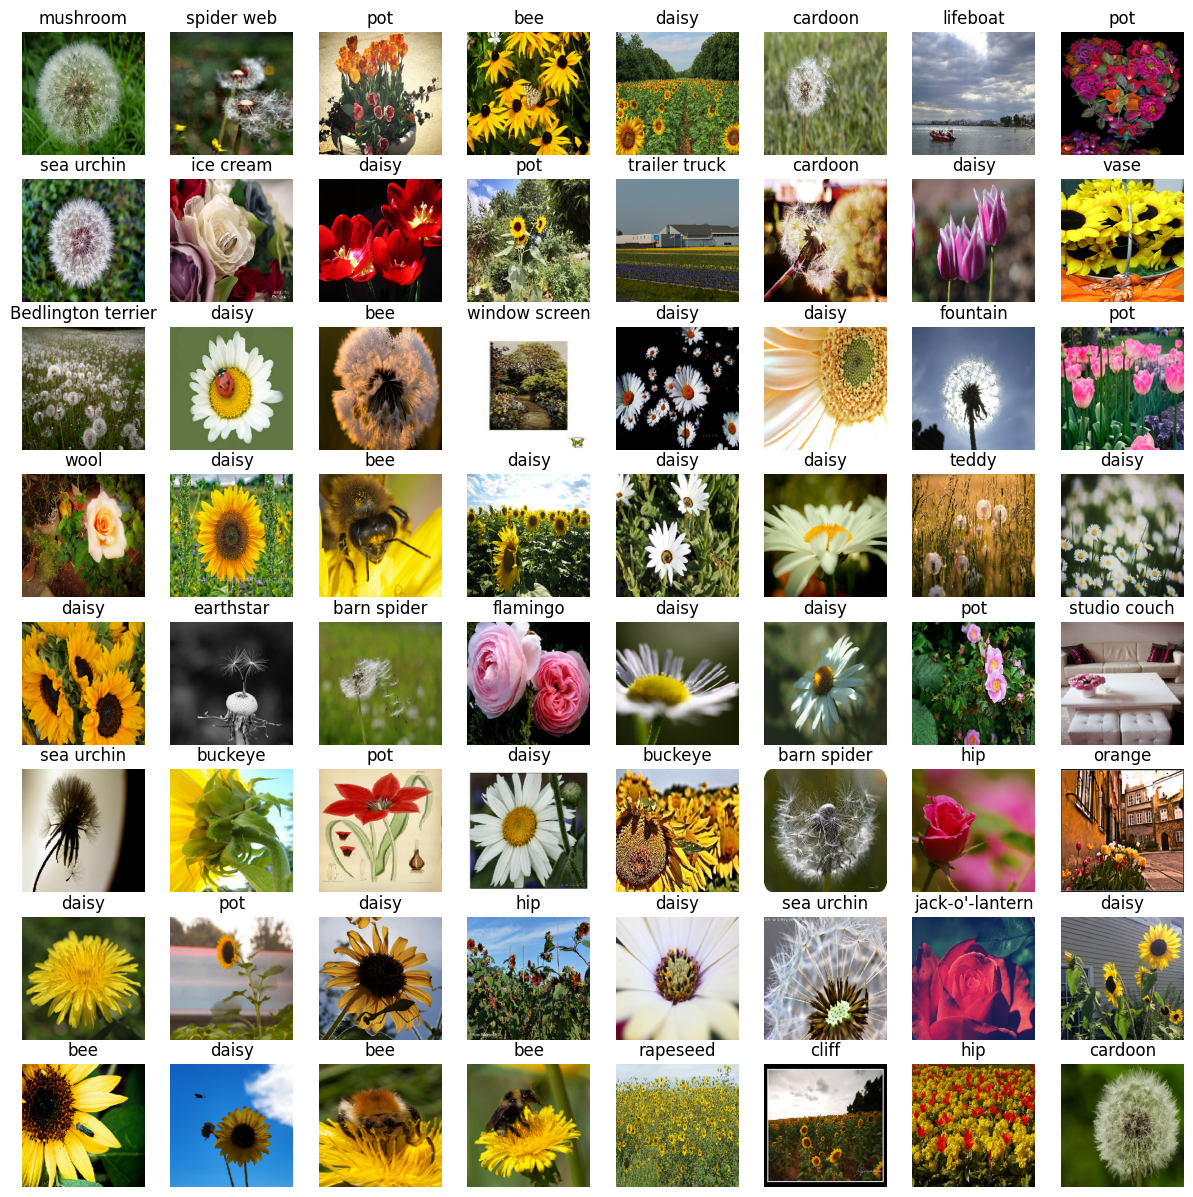

In [ ]:
plt.figure(figsize=(15,15))
for n in range(64):
  plt.subplot(8,8,n+1)
  plt.imshow(flowers_data_input_batch[n])
  plt.title(predicted_class_names[n])
  plt.axis('off')

# Etapa 5: Transfer learning

Download do MobileNet sem o topo do modelo:
https://tfhub.dev/s?module-type=image-feature-vector&q=tf2


In [ ]:
MobileNet_feature_extractor_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2" #@param {type:"string"}

In [ ]:
MobileNet_feature_extractor_layer = hub.KerasLayer(MobileNet_feature_extractor_url,
                                                   input_shape=(224, 224, 3))

In [ ]:
feature_batch = MobileNet_feature_extractor_layer(flowers_data_input_batch)
feature_batch.shape

TensorShape([64, 1280])

In [ ]:
MobileNet_feature_extractor_layer.trainable = False

In [ ]:
flower_data.num_classes

5

In [ ]:
model = tf.keras.Sequential([MobileNet_feature_extractor_layer,
                             tf.keras.layers.Dense(flower_data.num_classes, activation='softmax')])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
predictions = model(flowers_data_input_batch)
predictions.shape

TensorShape([64, 5])

In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit_generator(flower_data, epochs=50)

<ipython-input-85-72326cffe83c>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(flower_data, epochs=50)


Epoch 1/50
58/58 [==============================] - 28s 345ms/step - loss: 0.8061 - accuracy: 0.7082
Epoch 2/50
58/58 [==============================] - 12s 214ms/step - loss: 0.3894 - accuracy: 0.8744
Epoch 3/50
58/58 [==============================] - 13s 215ms/step - loss: 0.3125 - accuracy: 0.8992
Epoch 4/50
58/58 [==============================] - 12s 201ms/step - loss: 0.2666 - accuracy: 0.9123
Epoch 5/50
58/58 [==============================] - 12s 215ms/step - loss: 0.2342 - accuracy: 0.9259
Epoch 6/50
58/58 [==============================] - 12s 212ms/step - loss: 0.2126 - accuracy: 0.9351
Epoch 7/50
58/58 [==============================] - 12s 214ms/step - loss: 0.1912 - accuracy: 0.9439
Epoch 8/50
58/58 [==============================] - 13s 222ms/step - loss: 0.1747 - accuracy: 0.9507
Epoch 9/50
58/58 [==============================] - 12s 214ms/step - loss: 0.1609 - accuracy: 0.9583
Epoch 10/50
58/58 [==============================] - 14s 235ms/step - loss: 0.1480 - accura

# Etapa 6: Avaliação do modelo

In [ ]:
class_names = sorted(flower_data.class_indices.items(), key = lambda pair:pair[1])

In [ ]:
class_names

[('daisy', 0),
 ('dandelion', 1),
 ('roses', 2),
 ('sunflowers', 3),
 ('tulips', 4)]

In [ ]:
class_names = np.array([key.title() for key, value in class_names])

In [ ]:
class_names

array(['Daisy', 'Dandelion', 'Roses', 'Sunflowers', 'Tulips'],
      dtype='<U10')

In [ ]:
predicted_batch = model.predict(flowers_data_input_batch)
predicted_id = np.argmax(predicted_batch, axis=-1)
predicted_label_batch = class_names[predicted_id]

2/2 [==============================] - 0s 43ms/step


In [ ]:
predicted_id

array([1, 1, 4, 3, 3, 1, 2, 2, 1, 2, 4, 3, 4, 1, 4, 3, 1, 0, 1, 4, 0, 0,
       1, 4, 2, 3, 1, 3, 0, 0, 1, 0, 3, 1, 1, 2, 0, 0, 2, 2, 1, 3, 4, 0,
       3, 1, 2, 4, 1, 3, 3, 3, 4, 1, 2, 3, 3, 3, 1, 1, 3, 3, 4, 1])

In [ ]:
predicted_label_batch

array(['Dandelion', 'Dandelion', 'Tulips', 'Sunflowers', 'Sunflowers',
       'Dandelion', 'Roses', 'Roses', 'Dandelion', 'Roses', 'Tulips',
       'Sunflowers', 'Tulips', 'Dandelion', 'Tulips', 'Sunflowers',
       'Dandelion', 'Daisy', 'Dandelion', 'Tulips', 'Daisy', 'Daisy',
       'Dandelion', 'Tulips', 'Roses', 'Sunflowers', 'Dandelion',
       'Sunflowers', 'Daisy', 'Daisy', 'Dandelion', 'Daisy', 'Sunflowers',
       'Dandelion', 'Dandelion', 'Roses', 'Daisy', 'Daisy', 'Roses',
       'Roses', 'Dandelion', 'Sunflowers', 'Tulips', 'Daisy',
       'Sunflowers', 'Dandelion', 'Roses', 'Tulips', 'Dandelion',
       'Sunflowers', 'Sunflowers', 'Sunflowers', 'Tulips', 'Dandelion',
       'Roses', 'Sunflowers', 'Sunflowers', 'Sunflowers', 'Dandelion',
       'Dandelion', 'Sunflowers', 'Sunflowers', 'Tulips', 'Dandelion'],
      dtype='<U10')

In [ ]:
label_id = np.argmax(flowers_data_label_batch, axis=-1)
label_id

array([1, 1, 4, 3, 3, 1, 2, 2, 1, 2, 4, 3, 4, 1, 4, 3, 1, 0, 1, 4, 0, 0,
       1, 4, 2, 3, 1, 3, 0, 0, 1, 0, 3, 1, 1, 2, 0, 0, 2, 2, 1, 3, 4, 0,
       3, 1, 2, 4, 1, 3, 3, 3, 4, 1, 2, 3, 3, 3, 1, 1, 3, 3, 4, 1])

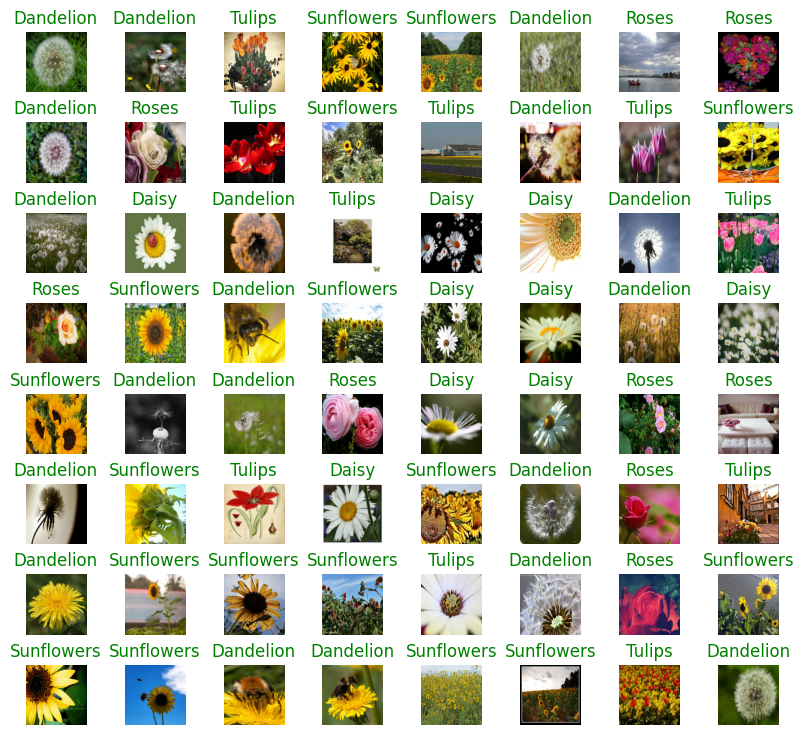

In [ ]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)

for n in range(64):
  plt.subplot(8,8,n+1)
  plt.imshow(flowers_data_input_batch[n])
  color = "green" if predicted_id[n] == label_id[n] else "red"
  plt.title(predicted_label_batch[n].title(), color=color)
  plt.axis('off')